<a href="https://colab.research.google.com/github/kodai-utsunomiya/memorization-and-generalization/blob/main/Generalizing_With_1s_and_0s_Do_Machine_Learning_Models_Memorize_or_Generalize%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. データデータセット


- **入力データ $ X $**: $ n $ 次元のバイナリベクトルから成る．具体的には，各サンプルは長さ $ n $ のバイナリ列．ここでは $ n = 30 $．
- **出力データ $ y $**: $ X $ の最初の $ k $ 次元の合計を2で割った余り．つまり，出力は次のように定義される：
  $$
  y_i = \left(\sum_{j=1}^{k} x_{ij}\right) \mod 2
  $$
  ここで，$ x_{ij} $ は入力ベクトルの $ i $-番目のサンプルの $ j $-番目の要素．

### 2. モデルの定義

- **隠れ層**: $ \mathrm{hidden\_size} $ 個のニューロンを持つ全結合層．活性化関数としてReLUを使用．隠れ層の出力は次のように計算される：
  $$
  h_i = \text{ReLU}(W_{hidden} \cdot x_i)
  $$
  ここで，$ W_{hidden} $ は隠れ層の重み行列．

- **出力層**: 1つのニューロンを持つ全結合層で，出力は次のように計算される：
  $$
  \hat{y}_i = W_{out} \cdot h_i
  $$
  ここで，$ W_{out} $ は出力層の重み行列．出力層の活性化関数はシグモイド関数：
  $$
  \hat{y}_i = \sigma(W_{out} \cdot h_i)
  $$
  ここで，$ \sigma(z) = \frac{1}{1 + \exp(-z)} $．

### 3. 損失関数と正則化

- **損失関数**: バイナリクロスエントロピー損失を使用．損失関数は次のように定義される：
  $$
  \mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(\hat{y}_i)) + (1 - y_i) \log(1 - \sigma(\hat{y}_i)) \right]
  $$

- **L1正則化**: モデルの重みの絶対値の和に基づく正則化．L1正則化項は次のように定義される：
  $$
  R_{L1} = \lambda \sum_{p} \|w_p\|_1
  $$
  ここで，$ \lambda $ は正則化パラメータ，$ w_p $ はモデルのパラメータ．

- **L2正則化**: モデルの重みの二乗和に基づく正則化．L2正則化項は次のように定義される：
  $$
  R_{L2} = \lambda \sum_{p} \|w_p\|_2^2
  $$
  ここで，$ \lambda $ は正則化パラメータ．

### 4. トレーニングと評価

- **トレーニング**: 各ステップで，ミニバッチのデータを用いて損失を計算し，バックプロパゲーションを行ってパラメータを更新する．損失関数には正則化項も含まれる：
  $$
  \text{Total Loss} = \mathcal{L} + R_{L1} \text{ or } R_{L2}
  $$
  この損失を最適化するために，SGDやAdamなどのオプティマイザを使用する．

- **評価**: 各エポックで，評価データを用いてモデルのパフォーマンスを確認する．評価損失と評価精度を計算．

# データの具体例

### データの生成

1. **入力データ**:
   - 入力データは $ n = 30 $ 次元のバイナリベクトル．
   - 各サンプルは 0 または 1 の値を持つ $ n $ 次元のベクトル．

2. **出力データ**:
   - 出力は，最初の $ k = 3 $ 次元の入力データの合計を2で割った余り．

### 具体例

以下のような入力データと出力データが生成される：

- **入力データ**（最初の5サンプル）:
  $
  \begin{array}{cccccccccccccccccccccccccccc}
  0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
  1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
  0 & 1 & 1 & 0 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 \\
  1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 \\
  0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0
  \end{array}
  $

- **出力データ**:
  - 各サンプルの出力は，最初の $ k = 3 $ 次元の入力データの合計の2で割った余り．
  - 上記の入力データに対する出力は次のように計算される：
    
    \begin{array}{cccc}
    \left(\sum_{j=1}^{3} 0, 1, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1 \\
    \left(\sum_{j=1}^{3} 1, 0, 1 \right) \mod 2 = \left(2\right) \mod 2 = 0 \\
    \left(\sum_{j=1}^{3} 0, 1, 1 \right) \mod 2 = \left(2\right) \mod 2 = 0 \\
    \left(\sum_{j=1}^{3} 1, 0, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1 \\
    \left(\sum_{j=1}^{3} 0, 1, 0 \right) \mod 2 = \left(1\right) \mod 2 = 1
    \end{array}
    

  したがって，出力データは次のようになる：
  $
  \begin{array}{cccc}
  1 \\
  0 \\
  0 \\
  1 \\
  1
  \end{array}
  $

# 学習の流れ

### 1. **データの次元**

#### 訓練データとテストデータ

- **入力データ**: $ \mathbf{X} \in \mathbb{R}^{N \times (n + 1)} $
  - $ N $: サンプル数（訓練データは `hyper['train_size']`，テストデータは `hyper['test_size']`）
  - $ n $: 特徴量の次元（ここでは 30）
  - バイアス項を追加することで，特徴量の次元が $ n + 1 $ になる．
  
- **出力ラベル**: $ \mathbf{y} \in \mathbb{R}^{N} $
  - 出力ラベルは各サンプルに対して 0 または 1 の二値．

### 2. **モデルの構造**

- **隠れ層**:
  - 入力次元: $ n + 1 $（特徴量 + バイアス項）
  - 出力次元: `hyper['hidden_size']`（ここでは 32）
  
  $
  \mathbf{h} = \text{ReLU}(\mathbf{X} \mathbf{W}_1 + \mathbf{b}_1)
  $
  - $ \mathbf{W}_1 \in \mathbb{R}^{(n + 1) \times \text{hidden_size}} $
  - $ \mathbf{b}_1 $ はバイアス項（ここでは使用していない）

- **出力層**:
  - 入力次元: `hyper['hidden_size']`（ここでは 32）
  - 出力次元: 1
  
  $
  \mathbf{y}_{\text{pred}} = \mathbf{h} \mathbf{W}_2 + \mathbf{b}_2
  $
  - $ \mathbf{W}_2 \in \mathbb{R}^{\text{hidden_size} \times 1} $
  - $ \mathbf{b}_2 $ はバイアス項（ここでは使用していない）

### 3. **トレーニングステップ**

1. **フォワードパス**:
   - 入力データ $ \mathbf{X} $ に対して，モデルの隠れ層と出力層を通して予測値を計算する．

   $
   \mathbf{h} = \text{ReLU}(\mathbf{X} \mathbf{W}_1)
   $

   $
   \mathbf{y}_{\text{pred}} = \mathbf{h} \mathbf{W}_2
   $

   次に，出力をシグモイド関数で変換して確率を得る．

   $
   \hat{\mathbf{y}} = \sigma(\mathbf{y}_{\text{pred}})
   $

   ここで，$ \sigma $ はシグモイド関数 $\sigma (z) = \frac{1}{1 + e^{-z}}$．

2. **損失計算**:
   - 損失関数として `BCEWithLogitsLoss`（バイナリ交差エントロピー損失）を使用．

   $
   \text{loss} = \text{BCEWithLogitsLoss}(\hat{\mathbf{y}}, \mathbf{y})
   $

   正則化項が加えられる（L1 または L2）．

   - L1正則化

   $
   \text{L1_Regularization} = \text{weight_decay} \times \sum_{i} \|\mathbf{W}_i\|_1
   $

   - L2正則化

   $
   \text{L2_Regularization} = \text{weight_decay} \times \sum_{i} \|\mathbf{W}_i\|_2^2
   $

   $
   \mathrm{total\_loss} = \text{loss} + \text{Regularization}
   $

3. **バックプロパゲーション**:
   - 損失関数に基づいて勾配を計算し，パラメータを更新する．

   $
   \mathbf{W}_1 \leftarrow \mathbf{W}_1 - \eta \frac{\partial \mathrm{total\_loss}}{\partial \mathbf{W}_1}
   $

   $
   \mathbf{W}_2 \leftarrow \mathbf{W}_2 - \eta \frac{\partial \mathrm{total\_loss}}{\partial \mathbf{W}_2}
   $

   ここで，$ \eta $ は学習率．

### 4. **評価ステップ**

1. **フォワードパス**:
   - 評価データ $ \mathbf{X}_{\text{eval}} $ に対して，モデルの出力を計算する．

   $
   \mathbf{h}_{\text{eval}} = \text{ReLU}(\mathbf{X}_{\text{eval}}\mathbf{W}_1)
   $

   $
   \mathbf{y}c = \mathbf{h}_{\text{eval}} \mathbf{W}_2
   $

   - 出力をシグモイド関数で変換して確率を得る．

   $
   \hat{\mathbf{y}}_{\text{pred}} = \sigma(\mathbf{y}_{\mathrm{pred\_eval}})
   $

2. **損失と精度の計算**:
   - 損失と精度を計算する．

   $
   \mathrm{eval\_loss} = \text{BCEWithLogitsLoss}(\hat{\mathbf{y}}_{\text{eval}}, \mathbf{y}_{\text{eval}})
   $

   $
   \text{accuracy} = \frac{\text{correct predictions}}{N_{\text{eval}}}
   $

### まとめ

- **次元**:
  - **入力**: $ \mathbf{X} \in \mathbb{R}^{N \times (n + 1)} $
  - **隠れ層**: $ \mathbf{h} \in \mathbb{R}^{N \times \text{hidden_size}} $
  - **出力**: $ \mathbf{y}_{\text{pred}} \in \mathbb{R}^{N} $

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import time

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 訓練と評価データの準備
hyper = {
    'n': 30,
    'k': 3,
    'train_size': 700,
    'test_size': 1000,
    'hidden_size': int(50),
    'loss_fn': 'cross_entropy', # ['hinge', 'cross_entropy'],
    'optimizer': 'adam', # ['sgd', 'adam', 'adamw]
    'regularization': 'l1', # ['l1', 'l2', 'none],
    'weight_decay' : 2e-05,
    'learning_rate': 0.006,
    'warm_up_steps': 1,
    'b1': .99,
    'b2': .98,
    'log_every': 16,
    'save_every': 16,
    'max_steps': 4500,
    'seed': 5
}

np.random.seed(hyper['seed'])

# 訓練データとテストデータを合わせたサンプル数を設定
total_size = hyper['train_size'] + hyper['test_size']

unique_binary_strings = set()

# 十分な数集まるまで繰り返す
while len(unique_binary_strings) < total_size:
    # 30次元のバイナリベクトルを生成
    binary_string = tuple(np.random.randint(2, size=hyper['n']))
    unique_binary_strings.add(binary_string)

# NumPy 配列に変換
inputs = np.array(list(unique_binary_strings), dtype=np.float32)

# 出力ラベルを計算．最初の k 次元の合計を 2 で割った余り
outputs = np.sum(inputs[:, :hyper['k']], axis=-1) % 2
# バイアス項（全要素が 1 の列）を追加するための配列を作成
ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
# バイアス項を入力データに追加
inputs = np.concatenate((inputs, ones_column), axis=1)

# データのインデックスをランダムに並べ替えてデータシャッフル
indices = np.random.permutation(len(inputs))
split_idx = int(hyper['train_size'])

# 訓練データとテストデータを分割
train_batch = (torch.tensor(inputs[indices[:split_idx]]).to(device), torch.tensor(outputs[indices[:split_idx]]).to(device))
eval_batch = (torch.tensor(inputs[indices[split_idx:]]).to(device), torch.tensor(outputs[indices[split_idx:]]).to(device))

# モデル定義
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(hyper['n'] + 1, hidden_size, bias=False)
        self.out = nn.Linear(hidden_size, 1, bias=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.out(x).squeeze()

model = Net(hyper['hidden_size']).to(device)

# 損失関数とオプティマイザの設定
if hyper['loss_fn'] == 'cross_entropy':
    loss_fn = nn.BCEWithLogitsLoss()
elif hyper['loss_fn'] == 'hinge':
    loss_fn = nn.HingeEmbeddingLoss()

if hyper['optimizer'] == 'sgd':
    optimizer = optim.SGD(model.parameters(), lr=hyper['learning_rate'])
elif hyper['optimizer'] == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=hyper['learning_rate'], betas=(hyper['b1'], hyper['b2']))
elif hyper['optimizer'] == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=hyper['learning_rate'], weight_decay=hyper['weight_decay'])

# L1正則化の関数
def l1_regularization(model, weight_decay):
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    return weight_decay * l1_norm

# L2正則化の関数
def l2_regularization(model, weight_decay):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return weight_decay * l2_norm

# トレーニング関数
def train_step(batch):
    model.train()
    optimizer.zero_grad()
    inputs, targets = batch
    outputs = model(inputs)
    loss = loss_fn(outputs, targets.float())

    # 正則化の追加
    if hyper['regularization'] == 'l1':
        loss += l1_regularization(model, hyper['weight_decay'])
    elif hyper['regularization'] == 'l2':
        loss += l2_regularization(model, hyper['weight_decay'])

    loss.backward()
    optimizer.step()

    preds = torch.sigmoid(outputs) > 0.5
    accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# 評価関数
def eval_step(batch):
    model.eval()
    inputs, targets = batch
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, targets.float())

        # 正則化の追加
        if hyper['regularization'] == 'l1':
            loss += l1_regularization(model, hyper['weight_decay'])
        elif hyper['regularization'] == 'l2':
            loss += l2_regularization(model, hyper['weight_decay'])

        preds = torch.sigmoid(outputs) > 0.5
        accuracy = (preds.int() == targets.int()).float().mean().item()

    return loss.item(), accuracy

# トレーニングと評価の記録用
all_metrics = []
saved_checkpoints = []

# トレーニングループ
for step in range(hyper['max_steps']):
    train_loss, train_acc = train_step(train_batch)
    if step % hyper['log_every'] == 0:
        eval_loss, eval_acc = eval_step(eval_batch)
        l1_norm = sum(param.abs().sum().item() for param in model.parameters())
        l2_norm = np.sqrt(sum(param.pow(2.0).sum().item() for param in model.parameters()))
        metrics = {
            'step': step,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'eval_loss': eval_loss,
            'eval_acc': eval_acc,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm
        }
        all_metrics.append(metrics)
        print(metrics)

    if step % hyper['save_every'] == 0:
        saved_checkpoints.append({'step': step, 'state_dict': model.state_dict()})

{'step': 0, 'train_loss': 0.6932754516601562, 'train_acc': 0.5414285659790039, 'eval_loss': 0.6980230212211609, 'eval_acc': 0.5070000290870667, 'l1_norm': 138.79356002807617, 'l2_norm': 4.030418380449185}
{'step': 16, 'train_loss': 0.6515573859214783, 'train_acc': 0.631428599357605, 'eval_loss': 0.7368565201759338, 'eval_acc': 0.5040000081062317, 'l1_norm': 151.3401370048523, 'l2_norm': 4.662613201045534}
{'step': 32, 'train_loss': 0.610810399055481, 'train_acc': 0.6642857193946838, 'eval_loss': 0.7442737221717834, 'eval_acc': 0.5059999823570251, 'l1_norm': 181.72516250610352, 'l2_norm': 5.656217711972976}
{'step': 48, 'train_loss': 0.5555388331413269, 'train_acc': 0.75, 'eval_loss': 0.7476487159729004, 'eval_acc': 0.5049999952316284, 'l1_norm': 220.58727359771729, 'l2_norm': 6.8661465772711185}
{'step': 64, 'train_loss': 0.49300074577331543, 'train_acc': 0.8042857050895691, 'eval_loss': 0.7699229717254639, 'eval_acc': 0.49900001287460327, 'l1_norm': 267.18898582458496, 'l2_norm': 8.28

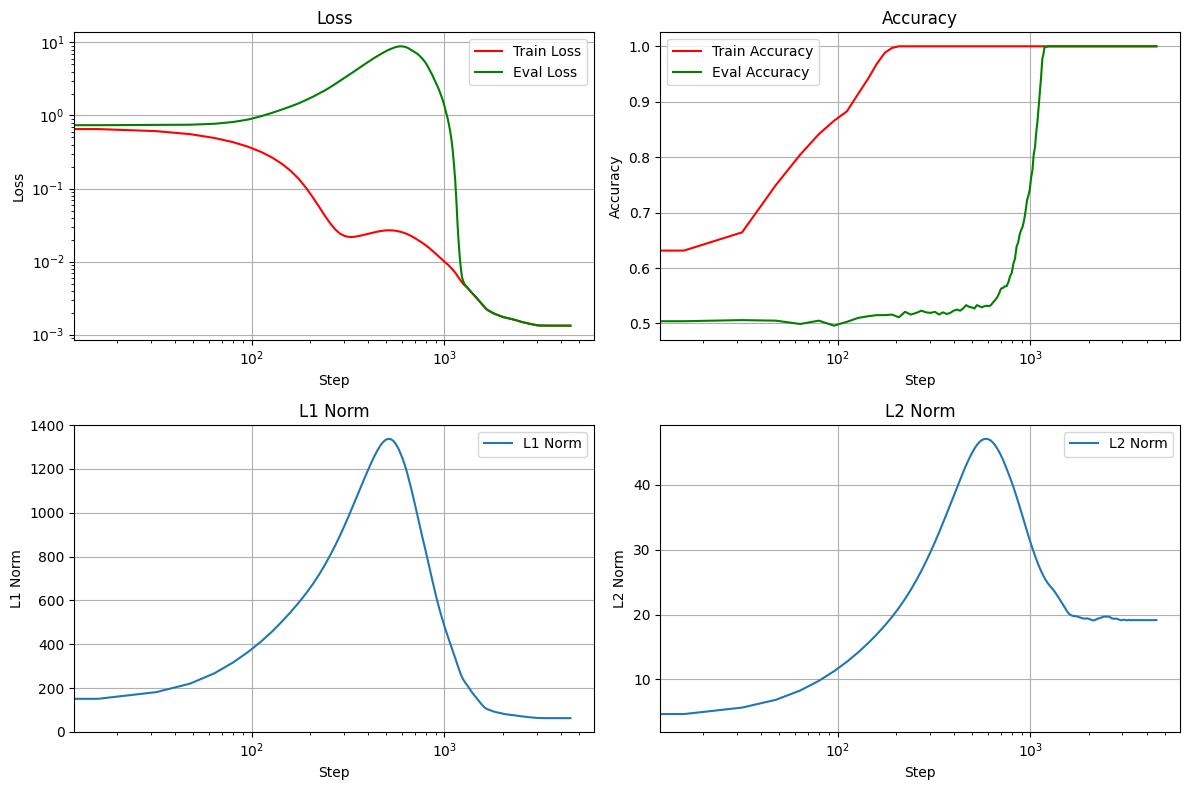

In [60]:
# 訓練の可視化
def plot_training(all_metrics):
    steps = [m['step'] for m in all_metrics]

    plt.figure(figsize=(12, 8))

    # Loss
    plt.subplot(2, 2, 1)
    train_loss = [m['train_loss'] for m in all_metrics]
    eval_loss = [m['eval_loss'] for m in all_metrics]
    plt.semilogx(steps, train_loss, label='Train Loss', color='red')
    plt.semilogx(steps, eval_loss, label='Eval Loss', color='green')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    plt.grid(True)

    # Accuracy (Train and Eval)
    plt.subplot(2, 2, 2)
    train_acc = [m['train_acc'] for m in all_metrics]
    eval_acc = [m['eval_acc'] for m in all_metrics]
    plt.semilogx(steps, train_acc, label='Train Accuracy', color='red')
    plt.semilogx(steps, eval_acc, label='Eval Accuracy', color='green')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)

    # L1 Norm
    plt.subplot(2, 2, 3)
    l1_norm = [m['l1_norm'] for m in all_metrics]
    plt.semilogx(steps, l1_norm, label='L1 Norm')
    plt.xlabel('Step')
    plt.ylabel('L1 Norm')
    plt.legend()
    plt.title('L1 Norm')
    plt.grid(True)

    # L2 Norm
    plt.subplot(2, 2, 4)
    l2_norm = [m['l2_norm'] for m in all_metrics]
    plt.semilogx(steps, l2_norm, label='L2 Norm')
    plt.xlabel('Step')
    plt.ylabel('L2 Norm')
    plt.legend()
    plt.title('L2 Norm')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training(all_metrics)

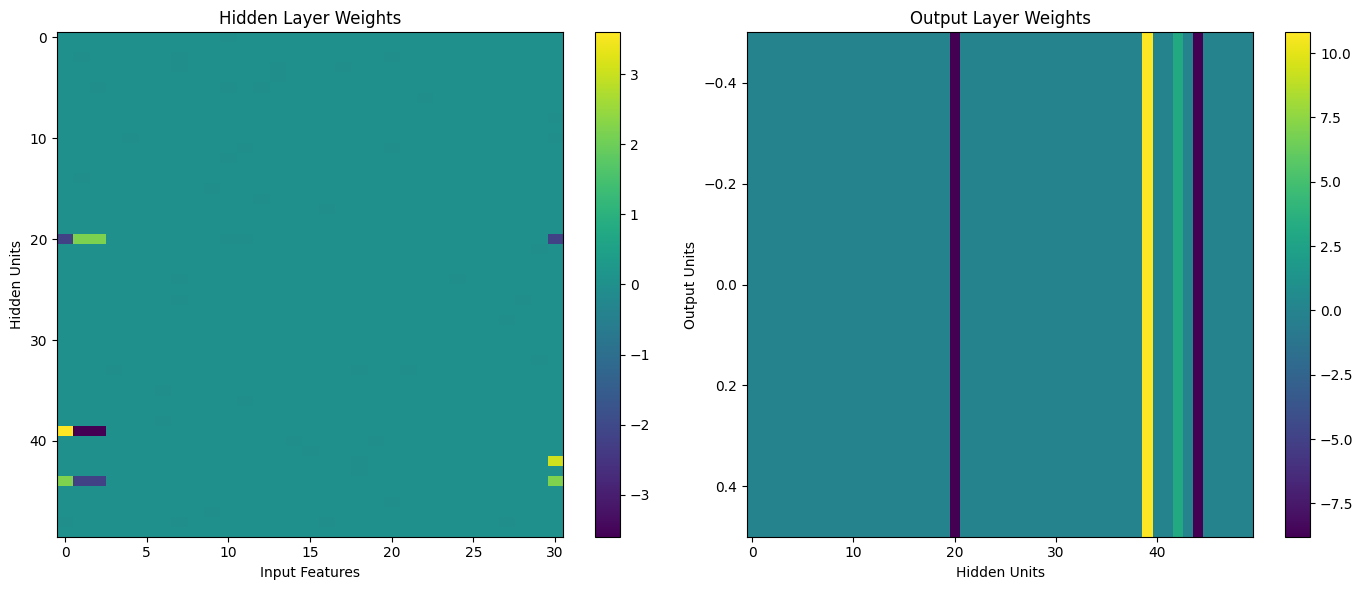

In [61]:
# モデルの重みの可視化
def visualize_weights(model):
    with torch.no_grad():
        hidden_weights = model.hidden.weight.cpu().numpy()
        output_weights = model.out.weight.cpu().numpy()

        plt.figure(figsize=(14, 6))

        # Hidden layer weights
        plt.subplot(1, 2, 1)
        plt.imshow(hidden_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title('Hidden Layer Weights')
        plt.xlabel('Input Features')
        plt.ylabel('Hidden Units')

        # Output layer weights
        plt.subplot(1, 2, 2)
        plt.imshow(output_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title('Output Layer Weights')
        plt.xlabel('Hidden Units')
        plt.ylabel('Output Units')

        plt.tight_layout()
        plt.show()

visualize_weights(model)